# US Permanent Visa Applications Analysis

#### This Dataset is taken from Kaggle.

#### Context  
A permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers.

#### Content
Data covers 2012-2017 and includes information on employer, position, wage offered, job posting history, employee education and past visa history, associated lawyers, and final decision.

#### Goal
To get meaningful insights from the data, visualize the general trends of employer and employee information over the years, understand the factors which affect the final decision, and in the end apply Machine Learning Algorithms on the chosen features to predict the final decision 


## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting Familiar with the dataset

In [2]:
#Reading Data
visa = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])
visa.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [3]:
#Cleaning Data

#Dropping Rows
visa = visa.dropna(axis=0, how='all')
#Dropping Columns
visa = visa.dropna(axis=1, how='all')


In [4]:
visa.shape

(374362, 154)

In [5]:
print(visa.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [6]:
#Checking Target value

visa['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

Withdrawn statuses will not help in Data Analysis & Certified-Expired also indicates that it was Certified

In [7]:
#Making necessary changes
visa=visa[visa['case_status']!='Withdrawn']
visa.loc[visa['case_status']=='Certified-Expired', 'case_status']='Certified'

visa['case_status'].value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

In [8]:
#Adding years column for visualisation yearwise
visa['year']=visa['decision_date'].dt.year

In [9]:
visa.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,year
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN,2012
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN,2011
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN,2011
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN,2011
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN,2012


## Visualisations

### Most Popular Employer Cities

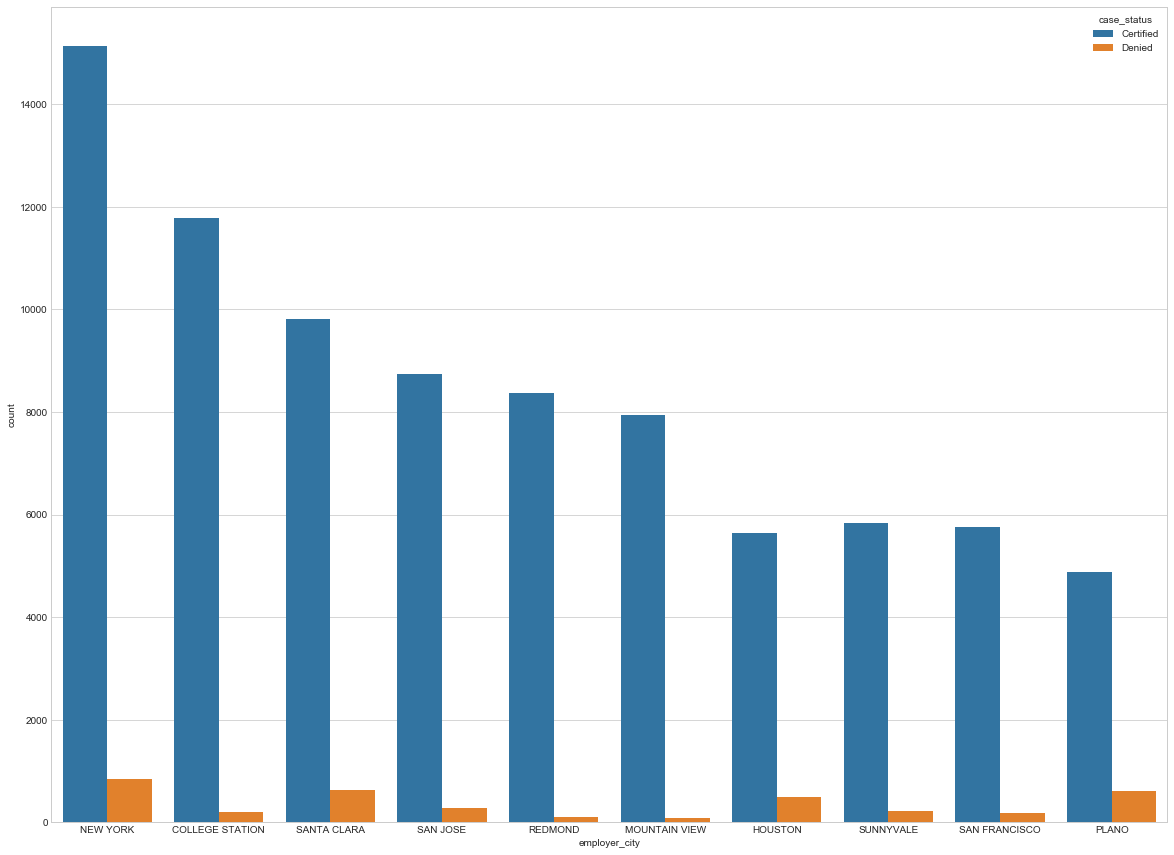

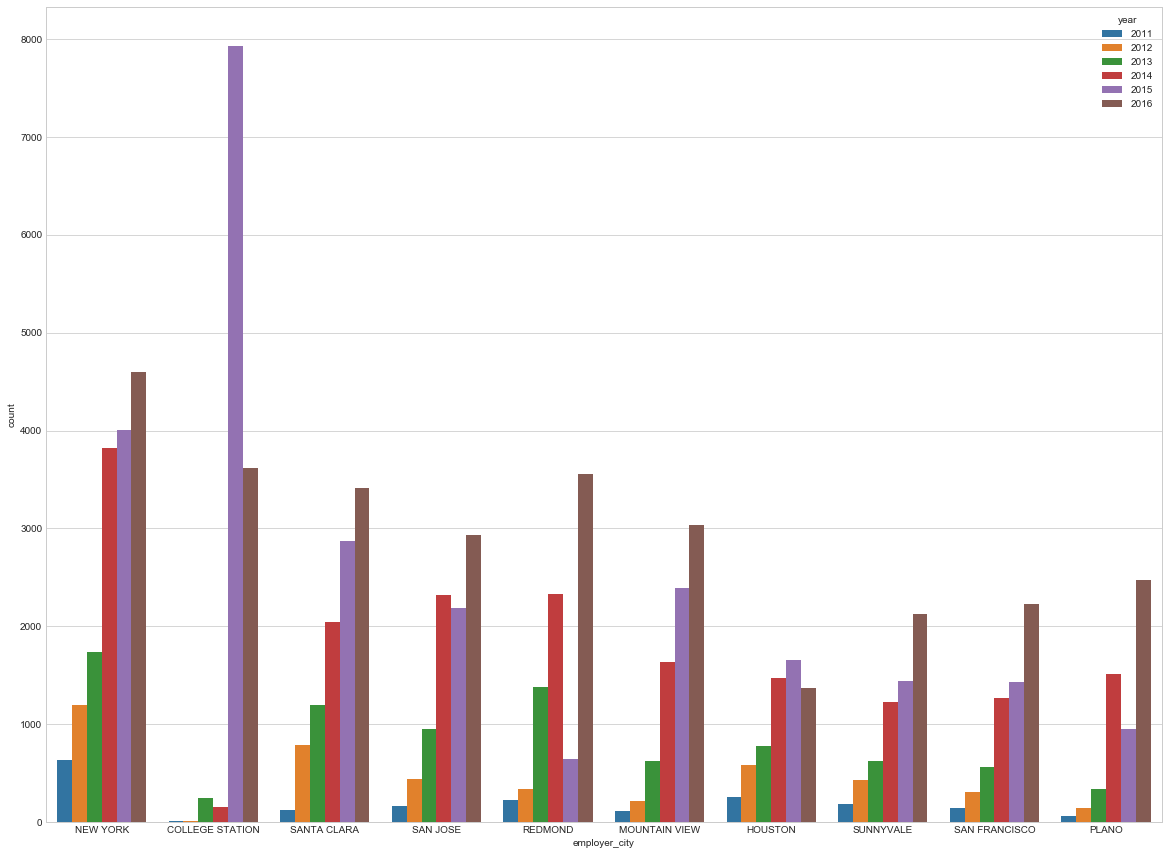

In [10]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,15))
sns.countplot('employer_city',hue='case_status', data=visa,order=visa.employer_city.value_counts().iloc[:10].index)
plt.figure(figsize=(20,15))
sns.countplot('employer_city',hue='year', data=visa,order=visa.employer_city.value_counts().iloc[:10].index)

Applications over the years have grown at a steady pace in the Top 10 most popular employer cities, except for city 'College Station' where the rise was dramatic in the year 2015.
Among the Top 10, 'New York' is the most popular employer city.
We can also see in the first graph that the number of visa applications Denied is quite less compared to the applications which were Certified.

###  Wages of Applicants

In [11]:
#changing previous salaries into numbers from string
visa['pw_amount_9089'] = visa['pw_amount_9089'].str.replace(",","")
visa.pw_amount_9089 =visa.pw_amount_9089.astype(float)


In [12]:
visa.pw_unit_of_pay_9089.unique()

array(['yr', 'hr', nan, 'bi', 'mth', 'wk', 'Hour', 'Year', 'Bi-Weekly',
       'Week', 'Month'], dtype=object)

In [13]:
# Changing unit of pay of wages of all applicants to year so that they can be compared
# Considering that people work for 250 days in a year
for i in visa.pw_unit_of_pay_9089.unique():
    if i == "hr" or i == "Hour":
        visa.loc[visa['pw_unit_of_pay_9089'] == i, 'pw_amount_9089'] = visa['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250) 
    elif i == "wk" or i == "Week":
        visa.loc[visa['pw_unit_of_pay_9089'] == i, 'pw_amount_9089'] = visa['pw_amount_9089'].apply(lambda x: float(x) * 50)
    elif i == "mth" or i == "Month":
        visa.loc[visa['pw_unit_of_pay_9089'] == i, 'pw_amount_9089'] = visa['pw_amount_9089'].apply(lambda x: float(x) * 12)
    elif i == "bi" or i == "Bi-Weekly":  
        visa.loc[visa['pw_unit_of_pay_9089'] == i, 'pw_amount_9089'] = visa['pw_amount_9089'].apply(lambda x: float(x) * 25)

In [14]:
visa['pw_unit_of_pay_9089']='Year'
visa.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089,year
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN,2012
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN,2011
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN,2011
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN,2011
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN,2012


In [15]:
# Splitting income into differnet slabs
visa['salaries'] = pd.cut(visa['pw_amount_9089'], [0, 25000, 50000,75000,100000,125000,150000,175000,200000,225000,250000,588000000], right=False, labels=["0-25k", "25-50k","50-75k","75-100k","100-125k","125-150k","150-175k","175-200k","200-225k","225k-250k","250k+"])


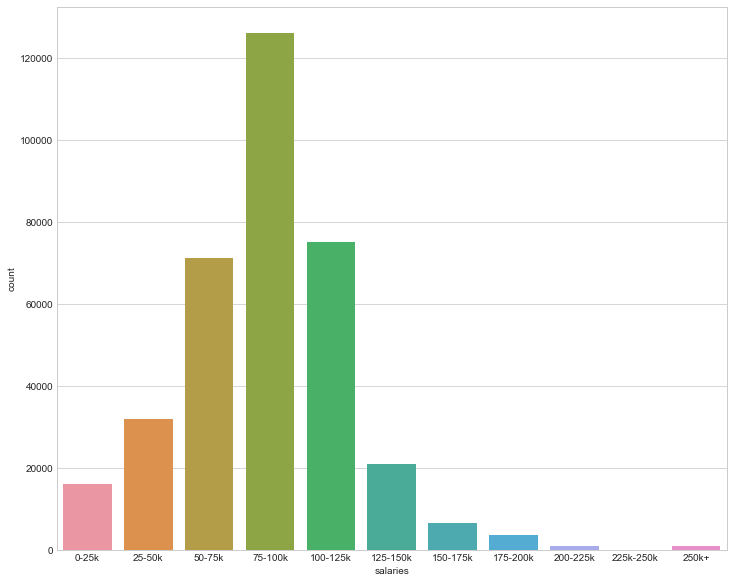

In [16]:
sns.set_style('whitegrid')
 
plt.figure(figsize=(12,10))
s=pd.Series(visa.salaries.value_counts())

sns.countplot('salaries',data=visa,order=s.index.categories)

Almost seems like a normal distribution if we don't consider outliers 

### Sectors with most applications

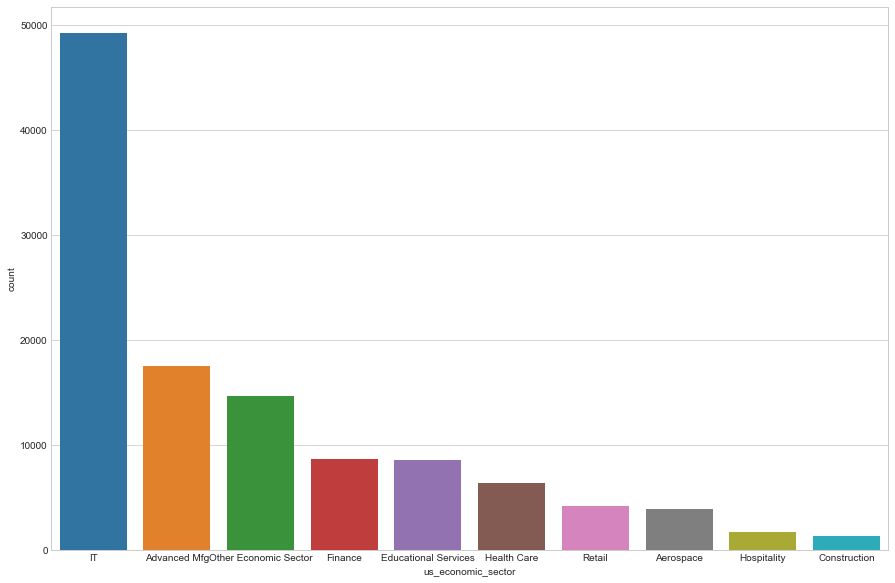

In [17]:
sns.set_style('whitegrid')

plt.figure(figsize=(15,10))
sns.countplot('us_economic_sector', data=visa,order=visa.us_economic_sector.value_counts().iloc[:10].index)

Above Graph indicates that IT is the most popular sector compared to other sectors.

### Applications in various sectors in different years

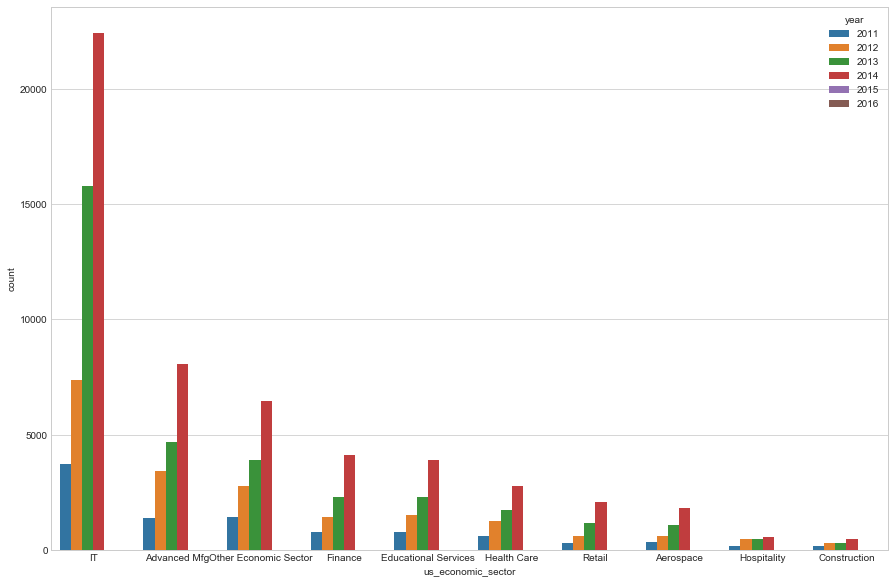

In [18]:
sns.set_style('whitegrid')
#  visa['us_economic_sector']
plt.figure(figsize=(15,10))
sns.countplot('us_economic_sector',hue='year', data=visa,order=visa.us_economic_sector.value_counts().iloc[:10].index)

### Countries with most applications over the years

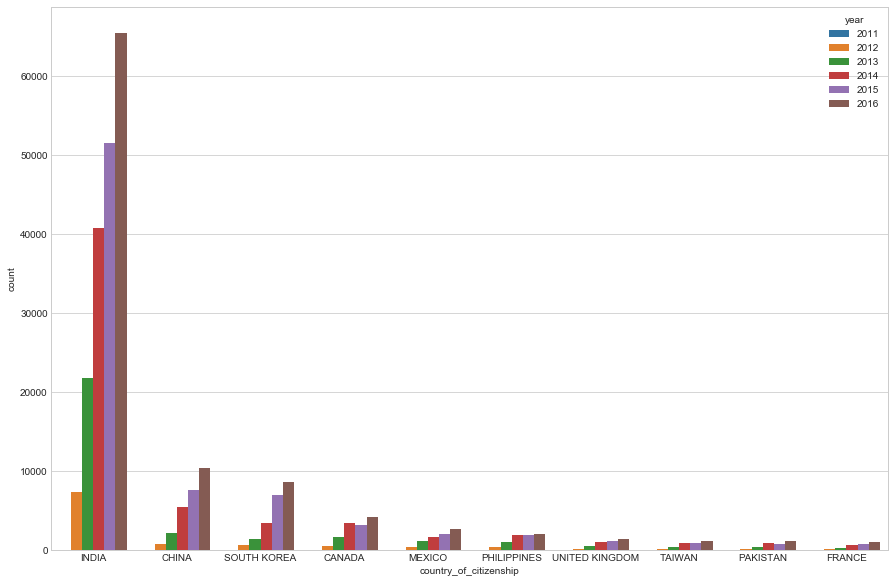

In [19]:
sns.set_style('whitegrid')
#   visa['country_of_citizenship']
plt.figure(figsize=(15,10))
sns.countplot('country_of_citizenship',hue='year', data=visa,order=visa.country_of_citizenship.value_counts().iloc[:10].index)

Most numbers of a have India as their country of citizenship.

### Top 5 countries with most applications and their Case Statuses

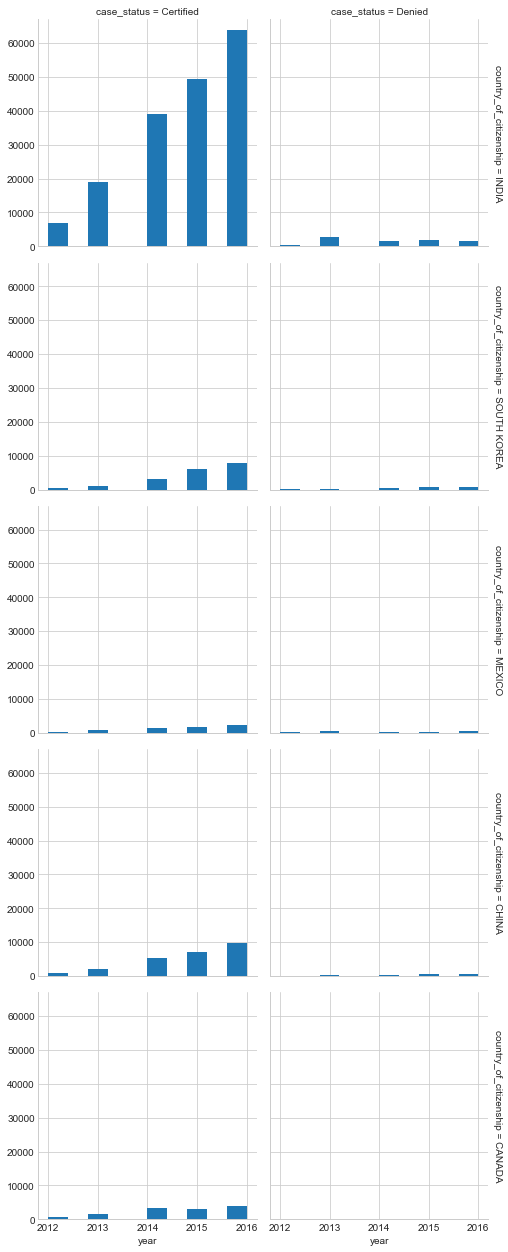

In [20]:
arr=list(visa.country_of_citizenship.value_counts().iloc[:5].index)
sample=visa[visa['country_of_citizenship'].isin(arr)]

sns.set_style('whitegrid')
#   visa['country_of_citizenship']
plt.figure(figsize=(55,55))
g=sns.FacetGrid(sample, row='country_of_citizenship',margin_titles=True, col='case_status', size=3.5,aspect=1)
g.map(plt.hist, 'year')

We can see the fact that was discussed earlier that most of the applications are Certified, is also evident in this plot and the number of applications Denied is meager.

### Employers which recieved maximum applications

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

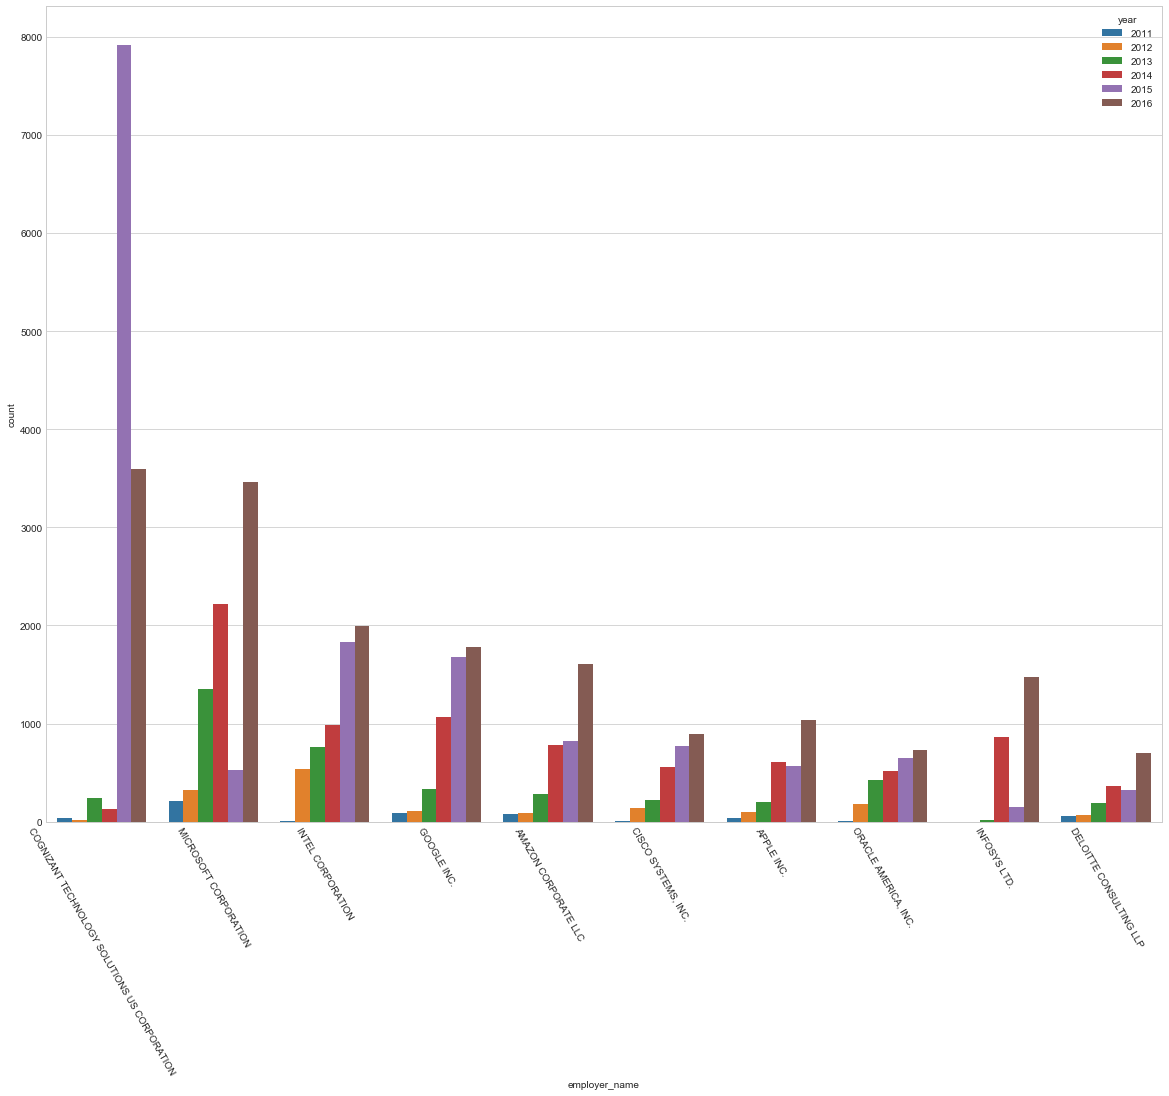

In [21]:
sns.set_style('whitegrid')
#   visa['country_of_citizenship']
plt.figure(figsize=(20,15))
sns.countplot('employer_name',hue='year', data=visa,order=visa.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=300)

The Top companies providing employment are from IT sector and this is not surprising as we had earlier seen that IT sector is the most popular sector. 

'Cognizant Technology Solutions US Corporation' received the most number of applications over the years and experienced an unexpected increase in 2015. Seems like most of the office of the company are in city 'College Station', as this city also experienced a dramatic increase in the number of applications in 2015.

### Employee education Levels

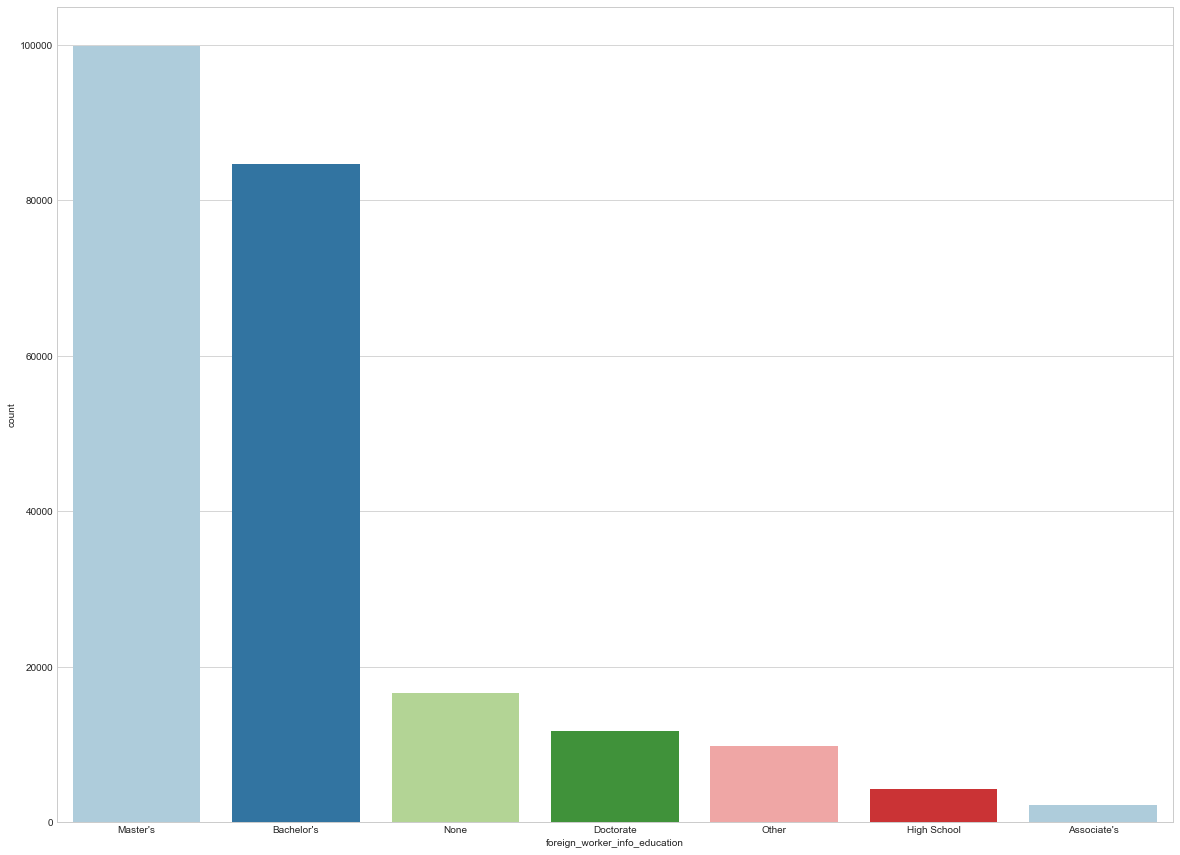

In [22]:
sns.set_style('whitegrid')
#   visa['country_of_citizenship']
plt.figure(figsize=(20,15))
sns.countplot(x='foreign_worker_info_education',data=visa, 
               palette = sns.color_palette("Paired"), 
               order=visa.foreign_worker_info_education.value_counts().iloc[:10].index)


Most of the applicants have completed their Master's Degree.

## Data Preprocessing 

Text(0,0.5,'Percentage Of null values')

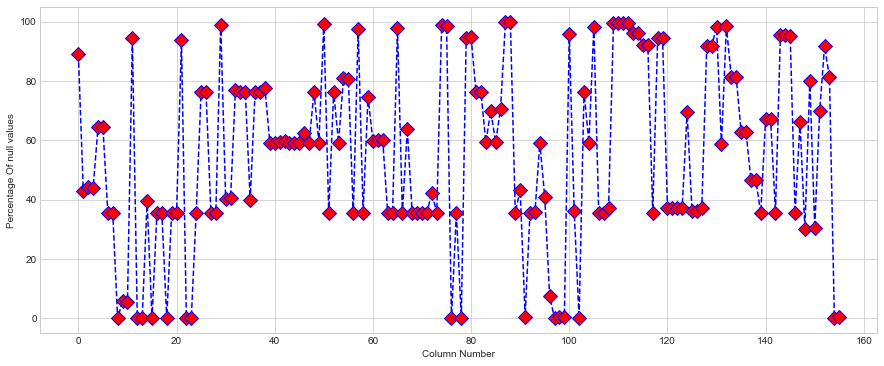

In [23]:
#Plotting Number of NULL values in each column
nan=[]
for i in visa.columns:
    l=visa[i].isnull().sum()/len(visa[i])
    l*=100
    nan.append(l)

plt.figure(figsize=(15,6))
plt.plot(range(len(visa.columns)),nan,color='blue', linestyle='dashed', marker='D',
         markerfacecolor='red', markersize=10)
plt.xlabel('Column Number')
plt.ylabel('Percentage Of null values')

Most of the columns have more than 30% of null values in them.

In [24]:
# Eliminating columns which have more than 20% of null value
visa=visa.dropna(axis=1, how='any', thresh=284935)
visa.shape

(356168, 19)

In [25]:
visa.columns

Index(['case_status', 'class_of_admission', 'country_of_citizenship',
       'decision_date', 'employer_address_1', 'employer_city', 'employer_name',
       'employer_postal_code', 'employer_state', 'job_info_work_city',
       'job_info_work_state', 'pw_amount_9089', 'pw_level_9089', 'pw_soc_code',
       'pw_soc_title', 'pw_source_name_9089', 'pw_unit_of_pay_9089', 'year',
       'salaries'],
      dtype='object')

In [26]:
for i in visa.columns:
    percent=visa[i].isnull().sum()/len(visa[i])
    percent*=100
    print(i,' has ',percent,'% Null values')

case_status  has  0.0 % Null values
class_of_admission  has  5.919959120415085 % Null values
country_of_citizenship  has  5.41092967363716 % Null values
decision_date  has  0.0 % Null values
employer_address_1  has  0.010388356056692347 % Null values
employer_city  has  0.0028076637991060398 % Null values
employer_name  has  0.002246131039284832 % Null values
employer_postal_code  has  0.009265290537049933 % Null values
employer_state  has  0.010388356056692347 % Null values
job_info_work_city  has  0.026672806091507382 % Null values
job_info_work_state  has  0.026953572471417983 % Null values
pw_amount_9089  has  0.6185283349430606 % Null values
pw_level_9089  has  7.4641742099234065 % Null values
pw_soc_code  has  0.10949888816513555 % Null values
pw_soc_title  has  0.6516587677725119 % Null values
pw_source_name_9089  has  0.5859594348734305 % Null values
pw_unit_of_pay_9089  has  0.0 % Null values
year  has  0.0 % Null values
salaries  has  0.6185283349430606 % Null values


In [27]:
visa.head()

,case_status,class_of_admission,country_of_citizenship,decision_date,employer_address_1,employer_city,employer_name,employer_postal_code,employer_state,job_info_work_city,job_info_work_state,pw_amount_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,year,salaries
0,Certified,J-1,NaN,2012-02-01,24 WEST 25 STREET,NEW YORK,NETSOFT USA INC.,10010.0,NY,New York,NY,75629.0,Level II,15-1031.00,"Computer Software Engineers, Applications",OES,Year,2012,75-100k
1,Denied,B-2,NaN,2011-12-21,200 BROAD STREET,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,7072.0,NY,New York,NY,37024.0,Level I,47-4041.00,Hazardous Materials Removal Workers,OES,Year,2011,25-50k
2,Certified,H-1B,NaN,2011-12-01,1054 TECHNOLOGY PARK DRIVE,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",23059.0,VA,Lutherville,MD,47923.0,Level I,17-2051.00,Civil Engineers,OES,Year,2011,25-50k
3,Certified,B-2,NaN,2011-12-01,33-17 PRINCE ST. 2ND FL,FLUSHING,EBENEZER MISSION CHURCH,11354.0,NY,Flushing,NY,21940.0,Level II,43-4071.00,File Clerks,OES,Year,2011,0-25k
4,Certified,L-1,NaN,2012-01-26,1373 BROADWAY,ALBANY,ALBANY INTERNATIONAL CORP.,12204.0,NY,Albany,NY,94890.0,Level IV,41-9031.00,Sales Engineers,OES,Year,2012,75-100k


In [28]:
visa['pw_soc_code'] = visa['pw_soc_code'].str.replace('.','')
visa['pw_soc_code'] = visa['pw_soc_code'].str.replace('-','')
visa['pw_soc_code'] = visa['pw_soc_code'].astype(str).str[0:6]
visa['pw_soc_code'].value_counts()

151132    110421
151121     32618
151133     20493
172072     12566
113021      7531
151031      6192
132011      6173
151142      5721
172141      5043
513022      4652
291063      4100
131111      4003
132051      3895
172071      3705
151141      3658
131161      3448
112021      3445
152041      3280
172112      2970
151051      2778
202111      2771
113031      2585
419031      2541
172131      2430
352014      2271
119041      2170
151131      2062
172051      2044
291069      2035
151032      1506
           ...  
537073         1
434141         1
435051         1
512091         1
472053         1
537071         1
433071         1
319097         1
512092         1
291020         1
519197         1
299012         1
319095         1
272023         1
393091         1
474051         1
211798         1
131032         1
493091         1
512021         1
519191         1
535031         1
454023         1
519021         1
472231         1
292057         1
193093         1
319094        

In [29]:
# Making a new data frame with only those columns which can used for further analysis
df = visa[['case_status', 'class_of_admission', 'country_of_citizenship',
            'employer_name', 'employer_city', 'employer_state',
            'pw_soc_code', 'pw_source_name_9089','salaries', 'year']].copy()
df.head()

,case_status,class_of_admission,country_of_citizenship,employer_name,employer_city,employer_state,pw_soc_code,pw_source_name_9089,salaries,year
0,Certified,J-1,NaN,NETSOFT USA INC.,NEW YORK,NY,151031,OES,75-100k,2012
1,Denied,B-2,NaN,PINNACLE ENVIRONEMNTAL CORP,CARLSTADT,NY,474041,OES,25-50k,2011
2,Certified,H-1B,NaN,"SCHNABEL ENGINEERING, INC.",GLEN ALLEN,VA,172051,OES,25-50k,2011
3,Certified,B-2,NaN,EBENEZER MISSION CHURCH,FLUSHING,NY,434071,OES,0-25k,2011
4,Certified,L-1,NaN,ALBANY INTERNATIONAL CORP.,ALBANY,NY,419031,OES,75-100k,2012


In [30]:
#Filling missing values 
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])
    print(i,' has ',df[i].isnull().sum()/len(df[i]),'% of null values')


case_status  has  0.0 % of null values
class_of_admission  has  0.0 % of null values
country_of_citizenship  has  0.0 % of null values
employer_name  has  0.0 % of null values
employer_city  has  0.0 % of null values
employer_state  has  0.0 % of null values
pw_soc_code  has  0.0 % of null values
pw_source_name_9089  has  0.0 % of null values
salaries  has  0.0 % of null values
year  has  0.0 % of null values


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 10 columns):
case_status               356168 non-null object
class_of_admission        356168 non-null object
country_of_citizenship    356168 non-null object
employer_name             356168 non-null object
employer_city             356168 non-null object
employer_state            356168 non-null object
pw_soc_code               356168 non-null object
pw_source_name_9089       356168 non-null object
salaries                  356168 non-null category
year                      356168 non-null int64
dtypes: category(1), int64(1), object(8)
memory usage: 27.5+ MB


### Data Conversion into labels

In [32]:
df.loc[df['case_status']=='Certified', 'case_status'] = 1
df.loc[df['case_status']=='Denied', 'case_status'] = 0


In [33]:
df['case_status'].value_counts()

1    330519
0     25649
Name: case_status, dtype: int64

In [34]:
#Turning Categorical data into labels

from sklearn.preprocessing import LabelEncoder

df1=df.apply(LabelEncoder().fit_transform)
df1.head()

,case_status,class_of_admission,country_of_citizenship,employer_name,employer_city,employer_state,pw_soc_code,pw_source_name_9089,salaries,year
0,1,28,79,43093,4838,76,76,3,10,1
1,0,5,79,47833,1012,76,592,3,7,0
2,1,19,79,54367,2614,99,122,3,7,0
3,1,5,79,18799,2316,76,511,3,0,0
4,1,31,79,2343,46,76,493,3,10,1


# Applying Machine Learning Algorithms

### Splitting data into training and testing data set

In [35]:
from sklearn.model_selection import train_test_split



In [36]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('case_status',axis=1), 
                                                    df1['case_status'], test_size=0.3, 
                                                    random_state=189)

## Applying Logistic Regression

### Training the model

In [37]:
#Using grid search cv for best parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 

In [38]:
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   3.8s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] .......................................... C=0.001, total=   1.5s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   2.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   2.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   2.3s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   41.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [39]:
grid.best_params_

{'C': 0.01}

In [40]:
grid.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction & Evaluation

In [41]:
predictions_lr = grid.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

In [43]:
print('Accuracy: ',accuracy_score(y_test, predictions_lr))
print(confusion_matrix(y_test,predictions_lr))
print(classification_report(y_test,predictions_lr))


Accuracy:  0.9274878101281223
[[  158  7555]
 [  193 98945]]
             precision    recall  f1-score   support

          0       0.45      0.02      0.04      7713
          1       0.93      1.00      0.96     99138

avg / total       0.89      0.93      0.90    106851



## Applying Decision Tree

### Training the model

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction & Evaluation

In [47]:
predictions_dt = dtree.predict(X_test)

In [48]:
print('Accuracy: ',accuracy_score(y_test, predictions_dt))
print(confusion_matrix(y_test,predictions_dt))
print(classification_report(y_test,predictions_dt))


Accuracy:  0.9055320025081656
[[ 2843  4870]
 [ 5224 93914]]
             precision    recall  f1-score   support

          0       0.35      0.37      0.36      7713
          1       0.95      0.95      0.95     99138

avg / total       0.91      0.91      0.91    106851



## Applying Random Forests

### Training the model

In [49]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100],
     'max_features': np.arange(2,6,1),
      'n_jobs':[-1]} 

In [50]:
# Using gridseacrhcv for getting the best parameters
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_features=2, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=2, n_estimators=100, n_jobs=-1, total=  14.5s
[CV] max_features=2, n_estimators=100, n_jobs=-1 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.2s remaining:    0.0s


[CV] ...... max_features=2, n_estimators=100, n_jobs=-1, total=  13.4s
[CV] max_features=2, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=2, n_estimators=100, n_jobs=-1, total=  12.0s
[CV] max_features=3, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=3, n_estimators=100, n_jobs=-1, total=  14.8s
[CV] max_features=3, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=3, n_estimators=100, n_jobs=-1, total=  15.1s
[CV] max_features=3, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=3, n_estimators=100, n_jobs=-1, total=  15.2s
[CV] max_features=4, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=4, n_estimators=100, n_jobs=-1, total=  17.8s
[CV] max_features=4, n_estimators=100, n_jobs=-1 .....................
[CV] ...... max_features=4, n_estimators=100, n_jobs=-1, total=  18.1s
[CV] max_features=4, n_estimators=100, n_jobs=-1 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': array([2, 3, 4, 5]), 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [51]:
grid.best_params_

{'max_features': 4, 'n_estimators': 100, 'n_jobs': -1}

In [52]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction and Evaluation

In [53]:
predictions_rf = grid.predict(X_test)

In [54]:
print('Accuracy: ',accuracy_score(y_test, predictions_rf))
print(confusion_matrix(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf))


Accuracy:  0.9377170077959027
[[ 2187  5526]
 [ 1129 98009]]
             precision    recall  f1-score   support

          0       0.66      0.28      0.40      7713
          1       0.95      0.99      0.97     99138

avg / total       0.93      0.94      0.93    106851



## Summary

In [55]:
comparison=pd.DataFrame()
l=[predictions_lr, predictions_dt, predictions_rf]
for i in l:
    precision,recall,fscore,support=precision_recall_fscore_support(y_test,i,average='micro')
    matrix=confusion_matrix(y_test,i)
    s=pd.Series([matrix[1,1], matrix[0,1], matrix[0,0], matrix[1,0], round(precision,2), round(recall,2), round(fscore,2)])
    comparison = pd.concat([comparison, s],axis=1)
    
comparison.columns = ['Logistic Regression', 'Decision Tree', 'Random Forests']
comparison.index = ['True Postives', 'False Positives', 'True Negatives', 'False Negatives', 'Precision', 'Recall', 'F1 Score']
comparison

,Logistic Regression,Decision Tree,Random Forests
True Postives,98945.00,93914.00,98009.00
False Positives,7555.00,4870.00,5526.00
True Negatives,158.00,2843.00,2187.00
False Negatives,193.00,5224.00,1129.00
Precision,0.93,0.91,0.94
Recall,0.93,0.91,0.94
F1 Score,0.93,0.91,0.94


##### We can see that Random Forests Algorithm outperformed both Logistic Regression & Decision Tree Algorithms and we achieved the highest Accuracy of 94% which is 1% higher than Logistic Regression's Accuracy & 3% higher than Decision Tree's Accuracy.